<a href="https://colab.research.google.com/github/z-arabi/pytorchTutorial/blob/master/07_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

[-1.3474603] -126.24922408781046


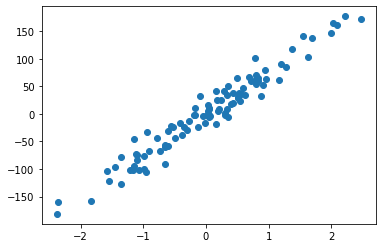

In [19]:
# 0) Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
print(X_numpy[0],y_numpy[0])

# plt.plot(X_numpy,y_numpy,marker='o',linestyle='')
plt.plot(X_numpy,y_numpy,'o')

In [13]:
# cast to float Tensor
print(X_numpy.dtype)
print(X_numpy.shape,y_numpy.shape)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
print(X.dtype)
print(X.shape,y.shape)

y = y.view(y.shape[0], 1)
print(X.shape,y.shape)

n_samples, n_features = X.shape

float64
(100, 1) (100,)
torch.float32
torch.Size([100, 1]) torch.Size([100])
torch.Size([100, 1]) torch.Size([100, 1])


In [14]:
# 1) Model
# Linear model f = wx + b
input_size = n_features

# linear regression
output_size = 1
model = nn.Linear(input_size, output_size)

In [15]:
# 2) Loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [16]:
# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 4149.4033
epoch: 20, loss = 2922.6396
epoch: 30, loss = 2086.1951
epoch: 40, loss = 1515.7625
epoch: 50, loss = 1126.6631
epoch: 60, loss = 861.2003
epoch: 70, loss = 680.0529
epoch: 80, loss = 556.4169
epoch: 90, loss = 472.0179
epoch: 100, loss = 414.3931


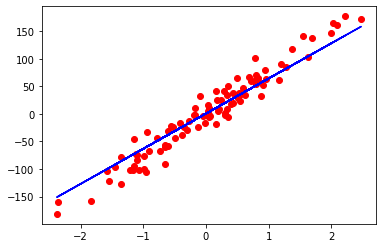

In [17]:
# Plot
# to plot with plt > convert tensor to numpy > .detach() to remove req grad > .numpy()
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()